# Guía 2 - Regresión Lineal

En este notebook comenzamos a trabajar en los problemas de **Regresión**, una de las tareas más importantes dentro del Aprendizaje Supervisado (dentro, a su vez, del gran área de Aprendizaje Automático). Un problema de regresión consiste en aprender a predecir una *etiqueta* *Y* continua o cuantitativa. a partir de un conjunto de atributos (también utilizaremos variables predictoras o *features*) **X** - que pueden ser uno, dos, o muchos más - tomando como muestra un conjunto de instancias. El modelo más común de regresión es la regresión lineal. Los modelos lineales se encuentran entre los modelos más simples, pero siguen siendo extremadamente comunes y útiles. Tienen algunas propiedades analíticas simples y son extremadamente fáciles de entrenar e interpretar. Además, son la base para un montón de modelos más complejos y modernos. Su importancia no debe ser subestimada.

## 1. Regresión Lineal - 1D

En la materia Introducción a la Ciencia de Datos ya han tenido un primer acercamiento a la regresión lineal. Aquí vamos a hacer un repaso de los principales conceptos que utilizaremos. Supongamos que queremos predecir una variable cuantitativa $Y$ como función de una única variable (por ahora, asumimos también cuantitativa) $X$. El modelo lineal asume que entre esas variables existe una relación del tipo

$$Y \approx \beta_0 + \beta_1 X,$$

donde $\beta_0$ y $\beta_1$ son los parámetros del modelo, en este caso conocidos como *ordenada al origen* y *pendiente*, respectivamente. Estos parámetros son, hasta que no utilicemos los datos, parámetros desconocidos del modelo, que debemos *ajustar*. Otra forma que a veces pueden encontrar para el modelo lineal es la siguiente: 

$$Y = \beta_0 + \beta_1 X + \epsilon, $$

donde $\epsilon$ es un término de error del modelo. A primera vista, este término puede ser muy confuso, pero esperamos que pronto quede claro qué significa. Notar que, en cualquiera de las dos formas, la variable predictora $X$ aparece de forma *lineal*, es decir, es decir, no está elevada al cuadrado, dentro de una raíz cuadrada, dentro de un seno, etc. Veremos en clases posteriores que este modelo es mucho más flexible de lo que parece. Tal vez les sorprenda leer ahora que podemos utilizar el modelo lineal para obtener relaciones no-lineales. 

**Referencias útiles**:

* Capítulo 3 de *An Introduction to Statistical Learning*. Lo pueden obtener [aquí](https://hastie.su.domains/ISLR2/ISLRv2_website.pdf).
* [Interpretable Machine Learning](https://christophm.github.io/interpretable-ml-book/limo.html)


**Repaso**

1. ¿Cuáles son las ventajas de utilizar un modelo lineal?¿Y las desventajas?
1. ¿Cuáles son las hipótesis del modelo lineal? Si no se cumplen, ¿significa que no podemos usar una regresión?

#### Dataset Sintético

Vamos a comenzar generando un dataset sintético. Esto quiere decir que vamos a conocer la verdadera relación entre nuestra variable objetivo $Y$ y nuestra variable predictora $X$. Esto NO es lo común, pero lo hacemos para que puedan ver el efecto de algunas características del proceso.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

La siguiente celda genera nuestro dataset sintético. Por ahora, serán 1000 puntos provenientes de una relación lineal 1-D de la forma $y = 3x - 2$. Asegúrate de identificar correctamente la pendiente ($\beta_1$) y la ordenada al origen ($\beta_0$).

In [2]:
n = 1000
X = np.linspace(-2,3,n)
y_real = 3*X - 2

Sin embargo, esta relación no es muy realista, ya que en cualquier proceso de medición suele introducirse *ruido*. ¿Dónde se origina ese ruido? Bueno, podríamos escribir mucho al respecto, desde detalles técnicos hasta aspectos filosóficos. Por ahora vamos a decir que depende de cada proceso, a veces lo podemos reducir, a veces no. Vamos a experimentar introduciendo ruido gaussiano, de forma de acercanos a un proceso de medición realista.

In [3]:
np.random.seed(2022)
alpha = 2
y = y_real + alpha*np.random.randn(n)

Graficamos los puntos obtenidos junto con la curva teórica.

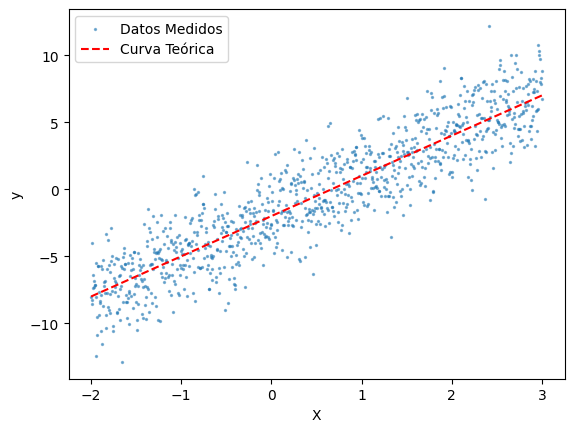

In [4]:
plt.scatter(X,y, s=2, alpha=0.5, label='Datos Medidos')
plt.plot(X, y_real, '--',label='Curva Teórica', c='r')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

Notar que, si bien los puntos no están sobre la línea teórica - debido al ruido -, la relación lineal parece mantenerse muy bien.

**Ejercicio:** jugar con el código introduciento diferentes niveles de ruido modificando la variable `alpha`. ¿Cuándo crees, a simple vista, que la relación lineal ya queda oculta por el ruido?

### 1.1 Regresión lineal con SciPy

Ahora vamos a hacer como si no conociéramos la relación entre $X$ e $y$ - nos olvidamos por un rato que sabemos cómo se generaron los datos - e intentaremos obtener la pendiente y ordenada al origen. Estos experimentos, donde generamos datos de una manera controlada, suelen ser muy útiles para familiarizarse con nuevos modelos y metodologías. De hecho, muchos paquetes, por ejemplo Scikit-Learn, vienen con funcionalidades para generar datasets sintéticos.

Para obtener los parámetros vamos a utilizar SciPy. Por ahora no entraremos en detalles sobre cómo funciona, solamente lo utilizaremos. Recomendamos consultar la [documentación de la función `stats.linregress`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html).

In [5]:
from scipy import stats

In [6]:
res = stats.linregress(X,y)
res

LinregressResult(slope=3.02413398375363, intercept=-1.9832291855752553, rvalue=0.9110611557361148, pvalue=0.0, stderr=0.04331828566850424, intercept_stderr=0.06622888724120699)

Para los que estén acostumbrados a trabajar con R, verán que estos resultados son muy parecidos a los que suelen encontrar. Devuelve la pendiente `slope`, la ordenada al origen `intercept`, el `rvalue`, el `pvalue`, la desviación estándar de la estimación de la pendiente`stderr` y la desviación estándar de la estimación de la ordenada al origen, `intercept_stderr`.

In [7]:
print(res.slope)
print(res.intercept)
print(res.rvalue)
print(res.pvalue)
print(res.stderr)
print(res.intercept_stderr)

3.02413398375363
-1.9832291855752553
0.9110611557361148
0.0
0.04331828566850424
0.06622888724120699


¿Qué son esos valores? Los dos primeros son autoexplicativos, son los parámetros que buscamos. Están bastante cerca de los valores reales (3.01 vs 3, -1.99 vs -2). 

Veamos el resultado gráficamente:

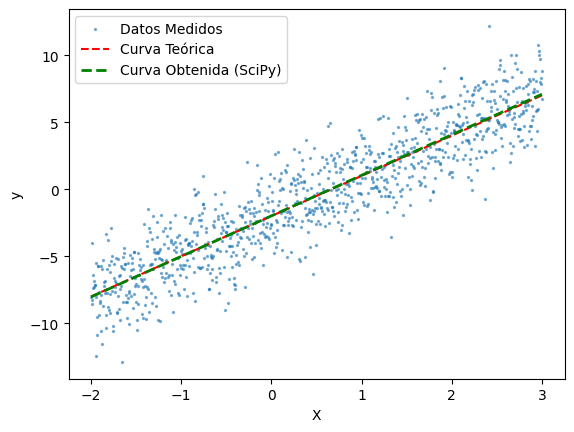

In [8]:
plt.scatter(X,y, s=2, alpha=0.5, label='Datos Medidos')
plt.plot(X, y_real, '--',label='Curva Teórica', c='r')
plt.plot(X, X*res.slope + res.intercept, '--', lw=2, label='Curva Obtenida (SciPy)', c='g')

plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

El ajuste parece ser muy bueno. ¿Estás de acuerdo?

**Ejercicio:** modificar los valores de `n` y `alpha` un par de veces (a mano) y observar cómo se modifican esos valores.

Si te interesa conocer más en profundidad esos parámetros, te recomendamos que mires el notebook de Extras.

No hemos sido muy rigurosos en las definiciones sobre la regresión lineal y los parámetros obtenidos. ¿Por qué?¿Es porque no son importantes?¡Para nada, son muy importantes! Pero ahora veremos otro enfoque, más típico de la comunidad de Aprendizaje Automático. Desde ya, aclaramos que este enfoque no es mejor ni peor, sino complementario. Un buen científico de datos sabe cuando utilizar uno u otro.

Empecemos notando algo. Cualquier método para ajustar datos - por ejemplo, el de regresión lineal que acabamos de usar - arranca con ciertos postulados sobre las características de esos datos. Para la regresión lineal que acabamos de usar alguno de estos son linealidad, normalidad, homocedasticidad, independencia, ausencia de multicolinealidad, etc. (pueden leer más [aquí](https://christophm.github.io/interpretable-ml-book/limo.html) o en la página de Wikipedia sobre regresión lineal). Cuando estas condiciones se cumplen, el método es óptimo, y los resultados que se desprenden del método tienen total validez (por ejemplo, cuando calculamos los intervalos de confianza). Entonces, antes de ajustar una regresión lineal, deberíamos chequear si esas hipótesis se cumplen. Sin embargo, salvo en contadas ocasiones, es muy difícil tener absoluta certeza de que así sea. En general, no hay ningún motivo para suponer que esas condiciones se cumplan exactamente y, en muchos casos, ni siquiera aproximadamente. ¿Entonces significa que no podemos usar el método? Por suerte, no. Si no se cumplen, eso no significa que el método sea malo. Probablemente haya uno mejor - que en general no sabemos cuál es - y debemos tener particular cuidado con las conclusiones estadísticas que desprendamos del método. Además, exiten  métodos que se proponen con muy pocas hipótesis y que no tienen garantía de optimalidad teórica. Otros métodos son óptimos en condiciones muy generales, pero solo cuando el tamaño de muestra tiende a infinito (es decir, cuando es muy grande nuestro conjunto de datos). En el mundo real, no hay ningún método que sea mejor que todos los demás en todos los casos.

Pero hay algo más que también es importante diferenciar. Algunas veces, cuando estamos estudiando cierto fenómeno, nuestro objetivo principal no es modelar su naturaleza y entenderlo, sino simplemente tener poder predictivo sobre lo que va a ocurrir. Entonces, ¿qué podemos hacer en este mundo de hipótesis, métodos y objetivos aparentemente disímeles? Un enfoque complementario - típico de la comunidad de Aprendizaje Automática y expresado de manera simplificada - es probar un método y "si funciona, funciona". Pero, ¿cuándo un método funciona? Cuando tiene **poder predictivo**. Nuestro objetivo principal ya no va a ser modelar y comprender la realidad, sino simplemente tener buenas predicciones.

Vamos a explorar este enfoque a continuación. Pero no queremos dejar de recalcar que ambos enfoques son complementarios y para nada excluyentes, por lo que no es necesario caer en falsas dicotomías. 

### 1.2 Regresión lineal con Scikit-Learn


Vamos a ajustar estos datos con la regresión lineal de Scikit-Learn. **Es prácticamente obligatorio que consulten la [documentación sobre regresión lineal de esa librería](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).**

En general, el uso de cualquier modelo de Aprendizaje Automático de Scikit-Learn sigue estos pasos.

1. Definición de un objeto modelo.

In [9]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
type(linear_model)

sklearn.linear_model._base.LinearRegression

2. Ajuste a los datos (`.fit(X,y)`). 

**Nota:** cuando trabajen con un solo atributo (X tiene un solo atributo), se van a topar con un error típico. Scikit-Learn espera que X tenga la forma de *número de instancias* x *número de atributos*, Entonces, debemos llevar X a esa forma.

In [10]:
print(X.shape)
X = X.reshape(-1,1)
print(X.shape)

(1000,)
(1000, 1)


Ya podemos ajustar

In [11]:
linear_model.fit(X, y)

LinearRegression()

Los parámetros del ajuste están en `linear_model.coef_` y `linear_model.intercept_`.

In [12]:
print(linear_model.coef_, linear_model.intercept_)

[3.02413398] -1.9832291855752557


Notar que son, salvo error de redondeo, los mismos valores que los devueltos por SciPy. Sin embargo, la pendiente es parte de un `array`... Eso es una pista de algo que se viene después. ¿Y el $R^2$, p valor, desviaciones estándar, etc.? Desaparecieron... Scikit-Learn no devuelve nada del estilo. Entonces, ¿Cómo podemos hacer para saber si el ajuste es bueno?

En primer lugar, vamos otra cosa que podemos hacer con el objeto `linear_model`. Podemos hacer predicciones.

3. Predicciones (`.predict(X)`). 

Todos los modelos de Scikit-Learn tienen un método `predict`.

In [13]:
y_pred = linear_model.predict(X)

Nuevamente, veamos el resultado gráficamente.

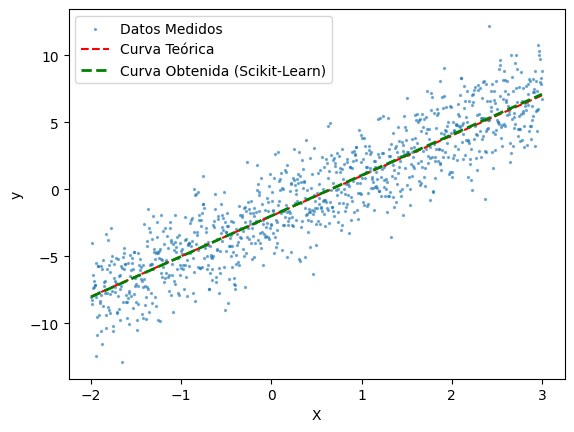

In [14]:
plt.scatter(X,y, s=2, alpha=0.5, label='Datos Medidos')
plt.plot(X, y_real, '--',label='Curva Teórica', c='r')
plt.plot(X, y_pred, '--', lw=2, label='Curva Obtenida (Scikit-Learn)', c='g')

plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

El ajuste evidentemente es tan bueno como el de SciPy, pero no tenemos ninguna métrica para evaluarlo. Podríamos calcular las mismas métricas de SciPy nosotros, pero podemos hacer algo más fácil y, en muchos casos, eficiente. Vamos a hacer una **Evaluación del modelo**.

### 1.3 Evaluación

La evaluación de un modelo es algo tan importante como su entrenamiento. Durante la cursada haremos mucho hincapié en esto. En un problema de regresión, lo primero que podemor hacer es comparar las predicciones obtenidas con los valores a predecir. Si el modelo está haciendo un buen trabajo, éstas deberían estar agrupadas alrededor de la identidad (la recta diagonal $y=x$).

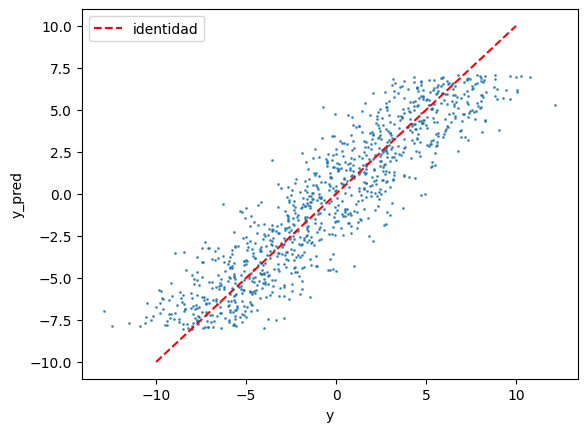

In [15]:
plt.scatter(y,y_pred, alpha=0.75, s=1)
plt.plot([-10,10],[-10,10], ls='--', c='r', label='identidad')
plt.xlabel('y')
plt.ylabel('y_pred')
plt.legend()
plt.show()

#### Métricas

Otra forma de evaluar un modelo - sumamente importante y útil - es calcular una métrica de desempeño. En los problemas de regresión es común utilizar métricas como el **error cuadrático medio**:

$$ MSE(y, \hat y) = \frac{1}{N}\sum_{i=1}^N (y_i - \hat y_i)^2 $$

donde $N$ es la cantidad de instancias e $\hat y$ son las predicciones del modelo. Notar que estamos comparando cada dato y predicción de manera individual.

**Para Pensar:** si tuvieras que decir de qué parámetros del modelo depende el error cuadrático medio (MSE), ¿qué dirías?

Otra métrica muy utilizada, y un poco más amigable, es la **raiz del error cuadrático medio**, ya que tiene las mismas unidades que la variable obejtivo $y$

$$ RMSE(y, \hat y) = \sqrt{MSE(y, \hat y)} $$

Notar que la evaluación de un modelo siempre consiste en comparar los valores predichos $\hat y$ y los valores objetivo $y$, utilizando alguna métrica. ¡Esto será cierto a lo largo del curso!

In [16]:
from sklearn.metrics import mean_squared_error

def root_mean_squared_error(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

print(f'MSE = {mean_squared_error(y,y_pred)}')
print(f'RMSE = {root_mean_squared_error(y,y_pred)}')

MSE = 3.9093127428202
RMSE = 1.9771982052440267


**Ejercicio (opcional para cuando terminen de leer el notebook)**: programar una función que calcule el error cuadrático medio dadas las etiquetas y los valores predichos.

En este caso, por una cuestión de magnitudes, dan muy parecido. Modifica `alpha` (por ejemplo, 2, 5 y 10) y vuelve a correr. ¿Qué ocurre con el RMSE? También observa el gráfico y trata de ver si puedes interpretar el valor del RMSE gráficamente.

Existen muchas métricas para evaluar un modelo de regresión. Cuál será conveniente dependerá del objetivo de nuestro análisis. No hemos profundizado en esto, pero notar que, en este caso, MSE es la misma métrica que utiliza Scikit-Learn (y SciPy) para obtener los coeficientes del ajuste lineal (comentario sobre esto hacia el final del notebook). Es decir, estamos evaluando con la misma métrica que usamos para entrenar. Muchas veces esto **no será así.**

#### Residuos

Un último análisis que podemos hacer es el análisis de residuos. Esto consiste en ver la diferencia entre nuestra predicción y el valor real. El residuo se define como 

$$ \text{res} = y - \hat y $$

Dos gráficos usuales que podemos hacer con los residuos son:

1. Su histograma

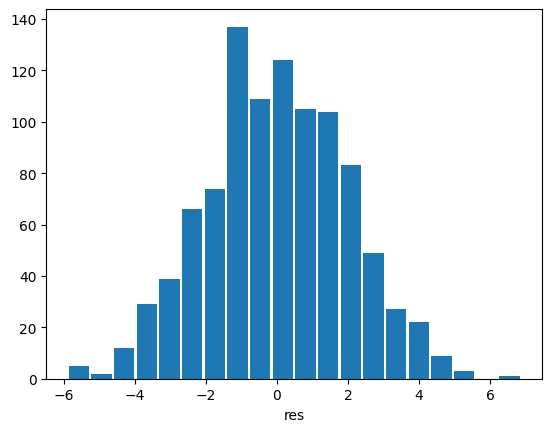

In [17]:
res = y - y_pred
plt.hist(res, bins = 20, rwidth = 0.9)
plt.xlabel('res')
plt.show()

En el enfoque clásico de regresión lineal, los residuos deben tener media cero y estar distribuidos normalmente. En la práctica, esto no suele suceder, ya que son necesarias muchas hipótesis para que así sea. Sin embargo, observar este gráfico puede darnos indicios de la calidad de nuestro modelo.

**Para pensar:** ¿Cuál te parece que es el *ancho* de esta distribución y con qué valor visto puede estar relacionado?

2. También podemos graficar la relación entre el residuos y el valor correspondiente de $X$

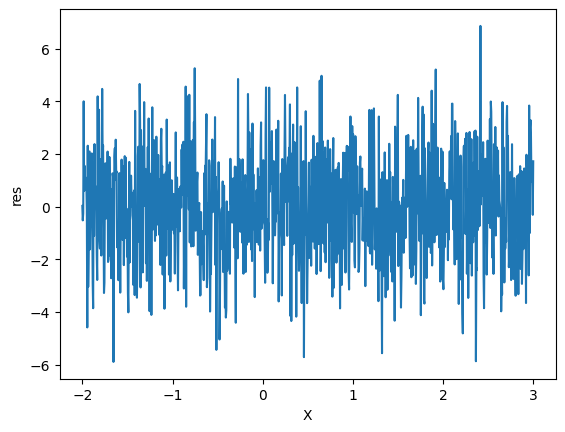

In [18]:
plt.plot(X, res)
plt.xlabel('X')
plt.ylabel('res')
plt.show()

Este gráfico también suele ser muy útil, ya que nos da una idea sobre en qué regiones de X el modelo anda mejor y en cuáles peor. A medida que hay más atributos predictores, este gráfico es más difícil de interpretar.

## 2. Regresión Lineal - 2D

La generalización de la regresión lineal a más atributos es muy sencilla. Por ejemplo, para dos atributos, $X_1$ y $X_2$, la forma es

$$Y \approx \beta_0 + \beta_1 X_1 + \beta_2 X_2.$$

Y, en el caso de $p$ variables predictoras, 

$$Y \approx \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3 + ... + \beta_p X_p.$$

Es decir, debemos encontrar una pendiente por cada atributo, pero sigue siendo una única ordenada al origen.

Ahora, replicaremos el mismo análisis, pero para una relación lineal con dos atributos, $y = -3x_1 + 2x_2 + 4$. Nuevamente, sumaremos algo de ruido para hacerlo más realista.

In [19]:
n = 1000
x1 = np.random.rand(n)
x2 = np.random.rand(n)
y = -3*x1 + 2*x2 + 4 + 0.25*np.random.randn(n)
# y = 10*(x1 - 0.5)**2 + 10*(x2-0.5)**2 + 0.1*np.random.randn(n) # Da como resultado una superficie curva, tipo cuenco.


Visualizamos. El código es un poco más complejo, no te preocupes si no lo entiendes.

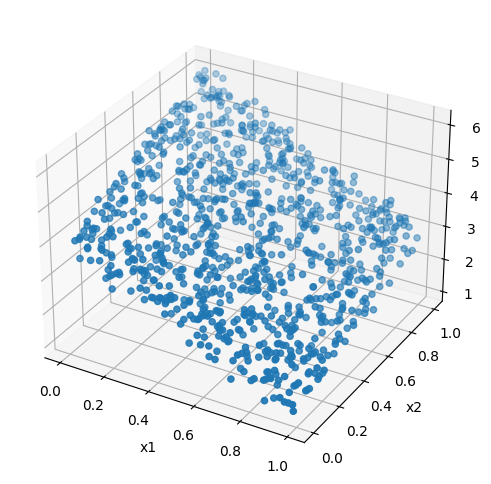

In [20]:
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_scatter(x1, x2, y, ax=None, fig = None):
    if (fig is None) and (ax is None):
        fig = plt.figure(figsize = (8,6))
        ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x1, x2, y)

    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('y')

plot_3d_scatter(x1, x2, y, ax=None, fig = None)

Creamos los atributos y hacemos un `train_test_split`

In [21]:
X = np.vstack((x1,x2)).T
print(X.shape)

(1000, 2)


Notar que tiene el `shape` que necesita Scikit-Learn. Definimos los modelos y entrenamos

In [22]:
linear_model = LinearRegression()
linear_model.fit(X, y)


LinearRegression()

Nuevamente, veamos qué aprendió. La regresión lineal obtiene **las pendientes** y la ordenada al origen

In [23]:
print(linear_model.coef_, linear_model.intercept_)

[-3.02407266  2.00575872] 4.0113520240478024


En este caso, la curva que aproxima a los datos no es más una curva, sino una superficie. La siguiente función nos ayuda a graficar. Nuevamente, no se preocupen si no entienden del todo lo que hace.

In [24]:
from matplotlib import cm

def plot_3d_regressor(x1_min, x1_max, x2_min,x2_max, N, regressor, ax=None, fig = None):
    x1 = np.linspace(x1_min,x1_max,N) 
    x2 = np.linspace(x2_min,x2_max,N)
    X1, X2 = np.meshgrid(x1,x2)
    
    y = regressor.predict(np.array([X1.ravel(), X2.ravel()]).T)
    Y = y.reshape(X1.shape)
    
    if (fig is None) and (ax is None):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
    
    surf = ax.plot_surface(X1, X2, Y, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, alpha = 0.5)

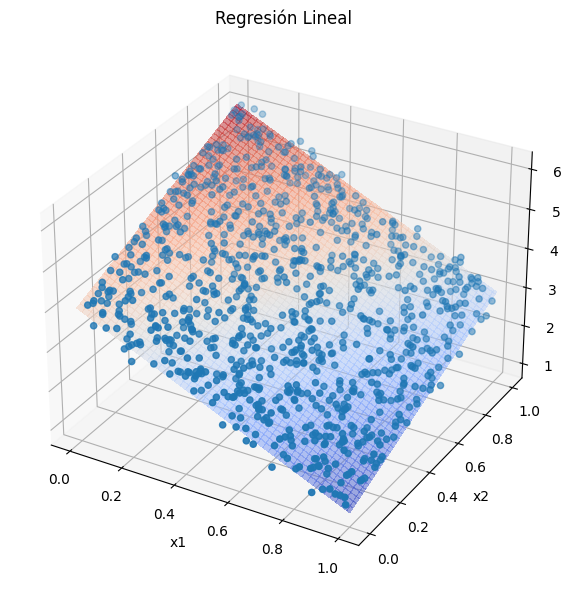

In [25]:
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(111, projection='3d')
plt.title('Regresión Lineal')
plot_3d_regressor(0, 1, 0, 1, 100, linear_model, ax, fig)
plot_3d_scatter(x1, x2, y, ax, fig)
plt.tight_layout()
plt.show()

Nuevamente, podemos hacer una evaluación de los resultados. Empecemos haciendo las predicciones.

In [26]:
y_pred = linear_model.predict(X)

Y repetimos la evaluación vista anteriormente.

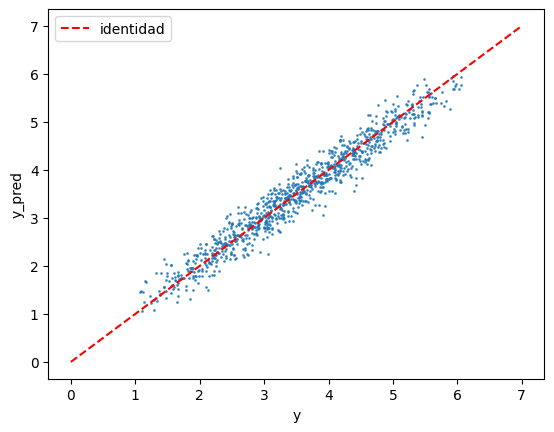

In [27]:
plt.scatter(y,y_pred, alpha=0.75, s=1)
plt.plot([0,7],[0,7], ls='--', c='r', label='identidad')
plt.xlabel('y')
plt.ylabel('y_pred')
plt.legend()
plt.show()

In [28]:
print(f'MSE = {mean_squared_error(y,y_pred)}')
print(f'RMSE = {root_mean_squared_error(y,y_pred)}')

MSE = 0.06373141165168839
RMSE = 0.2524508103605302


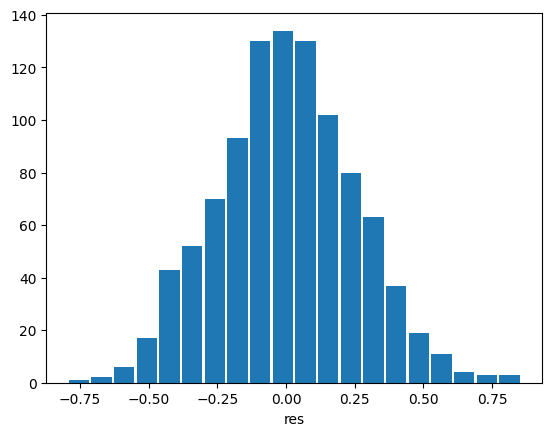

In [29]:
res = y - y_pred
plt.hist(res, bins = 20, rwidth = 0.9)
plt.xlabel('res')
plt.show()

Hasta acá vimos la aplicación de la regresión lineal a dos datasets sintéticos, uno con una variable predictora y otro con dos. Nada nos impide aplicar esta técnica a muchas más variables predictoras. La única diferencia es que ya no podremos visualizar la superficie obtenida.

## 3. Ejercitación

Vamos a aplicar lo visto sobre regresión lineal al dataset de Bicicletas Públicas de la Ciudad de Buenos Aires (EcoBici). Nuevamente, solamente vamos a utilizar los datos para el **año 2018**. 

El análisis que haremos es muy similar al que se encuentra en el [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/) de Jake VanderPlas sobre el dataset de pasos de bicicletas en el Puente Fremont de Seattle, EEUU, que pueden encontrar en la sección "In Depth: Linear Regression".

### Consigna

El objetivo es ajustar - o entrenar - un modelo lineal que prediga la cantidad de viajes en bicicleta en un dado día.

**Preliminares:**

1. ¿En qué contexto puede ser interesante abordar ese problema?
1. Piensa y evalúa qué atributos crees que pueden ser buenos predictores. Para ello, puedes volver al notebook de EDA sobre este dataset y observar la serie de tiempo de viajes por día. Mira qué características de la serie te llaman la atención.

**Ejecución:**

1. Abre los datos provistos en 'IAA_Guia_2_data.csv'. Cuando abras los datos, ten en cuenta que es importante que puedas trabajar con fechas. Si quieres saber cómo hemos llegado a ese dataset, puedes mirar el notebook 'IAA_Guia_2_PrePro_Dataset.ipynb'.
1. Agrega al DataFrame obtenido atributos que puedan llegar a ser buenos predictores (además de los que puedas encontrar). Recomendamos probar con:
    1. Una variable binaria que indique si se trata de un día de semana o de fin de semana.
    1. Una variable binaria que indique si se trata de un mes de vacaciones o no.
    
1. Agrupa las variables predictoras en una variable `X` y la variable a predecir en una variable `y`.
1. Entrena un modelo lineal. Observa los coeficientes obtenidos e interpreta.
1. Haz una evalución de los resultados obtenidos.

In [30]:
import seaborn as sns

In [31]:
df = pd.read_csv('../../datasets/IAA_Guia_2_data.csv')
df.head()

,Date,Viajes,PRCP,TMAX,TMIN,TAVG
0,2018-01-01,2079,0.0,NaN,17.5,22.2
1,2018-01-02,4077,0.0,NaN,18.6,25.4
2,2018-01-03,4852,0.0,33.0,16.9,26.1
3,2018-01-04,4543,0.0,NaN,22.2,29.2
4,2018-01-05,3365,0.0,36.7,NaN,24.8


In [32]:
df['Date'] = pd.to_datetime(df['Date'])
type(df['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

<Axes: xlabel='Date', ylabel='Viajes'>

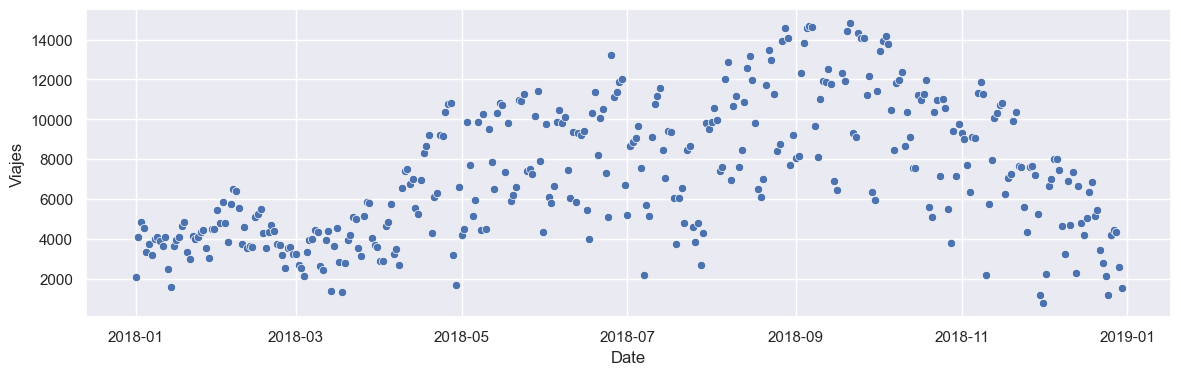

In [33]:
sns.set(rc={'figure.figsize':(14, 4)})
sns.scatterplot(data=df, x="Date", y="Viajes")

In [34]:
df['Finde'] = df['Date'].apply(lambda x: x.weekday() > 4)
df['MesActivo'] = df['Date'].apply(lambda x: x.month not in [1, 2, 8, 12])
df

,Date,Viajes,PRCP,TMAX,TMIN,TAVG,Finde,MesActivo
0,2018-01-01,2079,0.0,NaN,17.5,22.2,False,False
1,2018-01-02,4077,0.0,NaN,18.6,25.4,False,False
2,2018-01-03,4852,0.0,33.0,16.9,26.1,False,False
3,2018-01-04,4543,0.0,NaN,22.2,29.2,False,False
4,2018-01-05,3365,0.0,36.7,NaN,24.8,False,False
...,...,...,...,...,...,...,...,...
358,2018-12-26,4187,0.0,NaN,24.0,27.9,False,False
359,2018-12-27,4471,0.0,31.7,24.0,27.7,False,False
360,2018-12-28,4341,0.0,31.6,23.3,26.8,False,False
361,2018-12-29,2598,23.9,30.7,20.5,26.1,True,False


In [35]:
viajes_promedio = df['Viajes'].mean()
viajes_promedio

7190.3608815427

In [36]:
df.isnull().sum()

Date           0
Viajes         0
PRCP           0
TMAX         173
TMIN          14
TAVG           0
Finde          0
MesActivo      0
dtype: int64

Debido a la gran cantidad de datos faltantes en TMAX y TMIN, se opta por la estrategia de imputar los datos faltantes con TAVG

In [37]:
df['TMAX'] = df['TMAX'].fillna(df['TAVG'])
df['TMIN'] = df['TMIN'].fillna(df['TAVG'])
df

,Date,Viajes,PRCP,TMAX,TMIN,TAVG,Finde,MesActivo
0,2018-01-01,2079,0.0,22.2,17.5,22.2,False,False
1,2018-01-02,4077,0.0,25.4,18.6,25.4,False,False
2,2018-01-03,4852,0.0,33.0,16.9,26.1,False,False
3,2018-01-04,4543,0.0,29.2,22.2,29.2,False,False
4,2018-01-05,3365,0.0,36.7,24.8,24.8,False,False
...,...,...,...,...,...,...,...,...
358,2018-12-26,4187,0.0,27.9,24.0,27.9,False,False
359,2018-12-27,4471,0.0,31.7,24.0,27.7,False,False
360,2018-12-28,4341,0.0,31.6,23.3,26.8,False,False
361,2018-12-29,2598,23.9,30.7,20.5,26.1,True,False


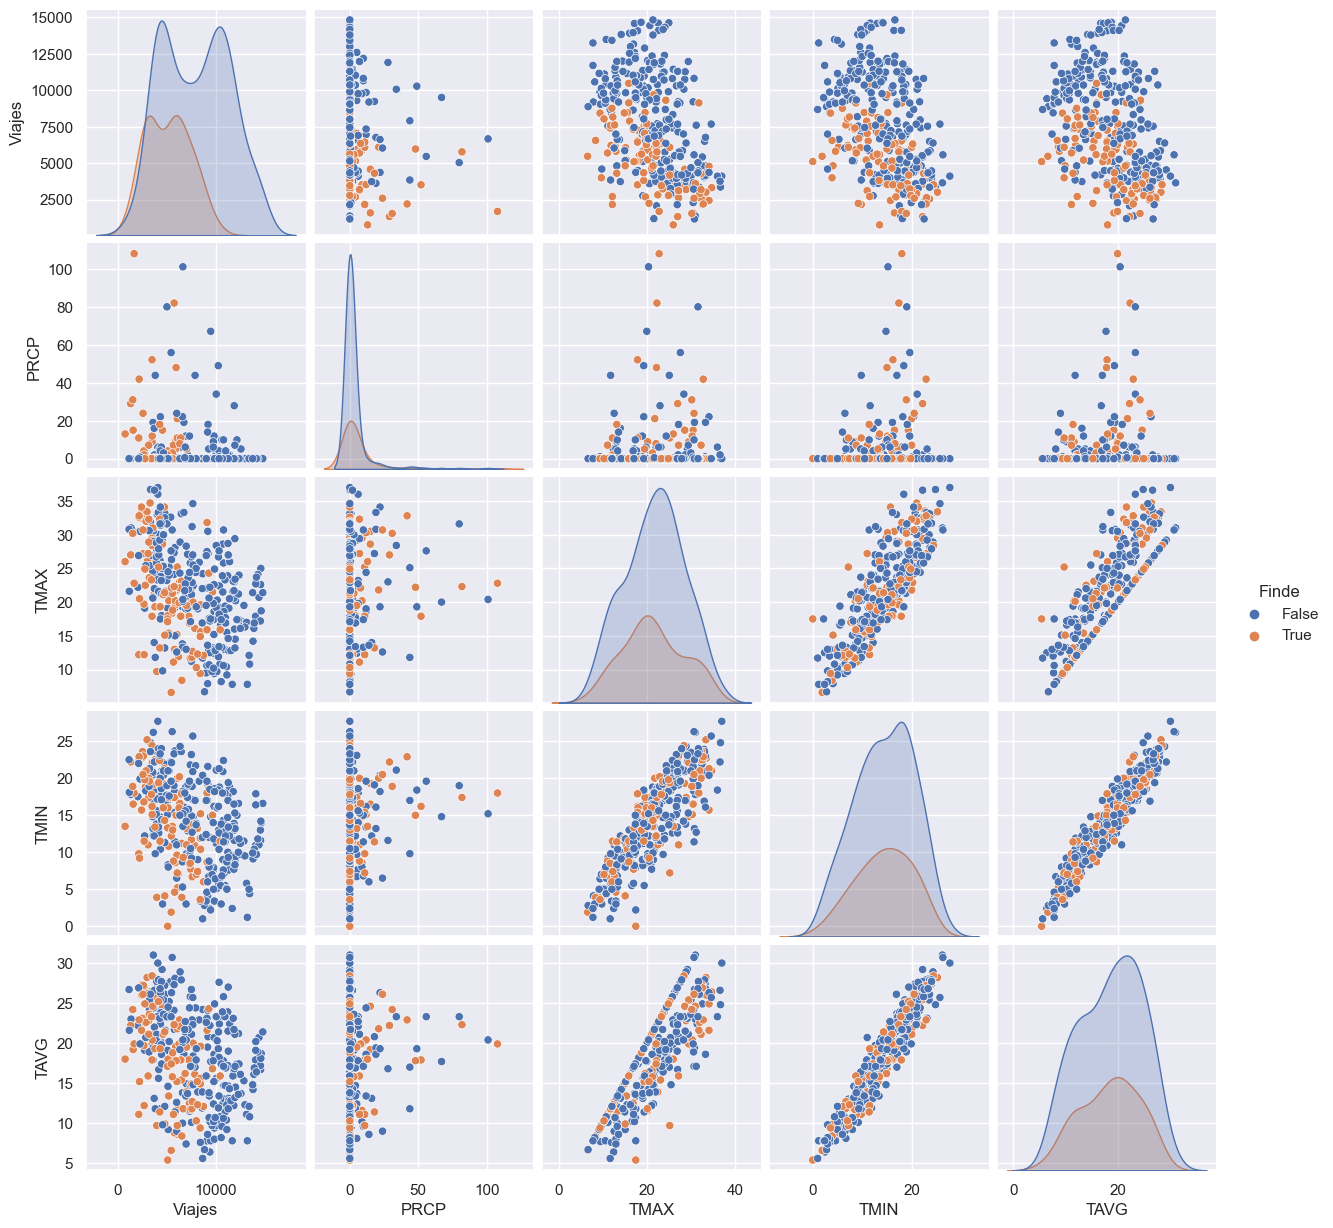

In [38]:
sns.pairplot(data=df[['Viajes', 'PRCP', 'TMAX', 'TMIN', 'TAVG', 'Finde']], hue="Finde")

Se procede a crear 4 regresiones teniendo en cuenta PRCP, TAVG, Finde y MesActivo para deducir la cantidad de Viajes

In [39]:
df_laboral_bicis = df[(df.Finde == False) & (df.MesActivo)][['PRCP', 'TAVG', 'Viajes']]
X1 = df_laboral_bicis[['PRCP', 'TAVG']]
y = df_laboral_bicis[['Viajes']]
X1

,PRCP,TAVG
59,0.3,25.4
60,0.0,27.1
63,0.0,26.1
64,0.0,20.6
65,0.0,21.1
...,...,...
328,0.0,22.9
329,0.0,22.3
330,0.0,21.7
331,0.0,20.2


In [40]:
X1 = np.vstack((X1.PRCP,X1.TAVG)).T

In [41]:
linear_model = LinearRegression()
linear_model.fit(X1, y)

LinearRegression()

In [42]:
print(linear_model.coef_, linear_model.intercept_)

[[ -20.33980777 -112.73478317]] [10756.69704309]


In [43]:
y_pred = linear_model.predict(X1)

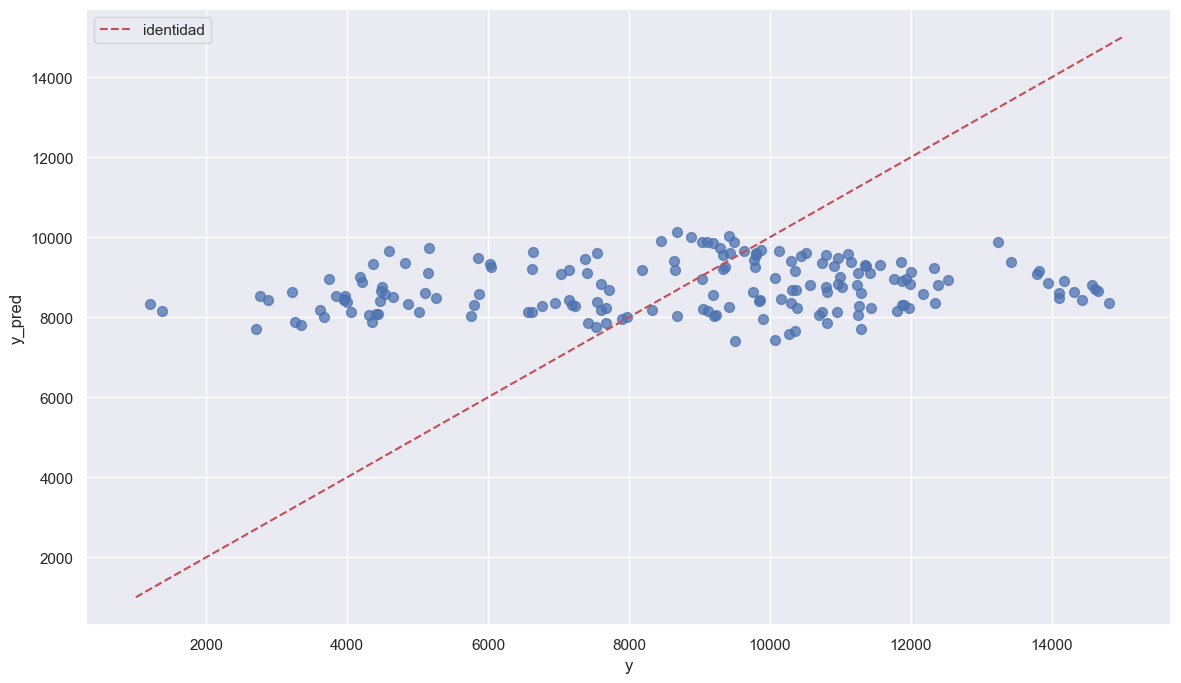

In [44]:
sns.set(rc={'figure.figsize':(14, 8)})
plt.scatter(y,y_pred, alpha=0.75, s=50)
plt.plot([1_000,15_000],[1_000,15_000], ls='--', c='r', label='identidad')
plt.xlabel('y')
plt.ylabel('y_pred')
plt.legend()
plt.show()

In [45]:
df_laboral_bicis['ViajesPred'] = y_pred
df_laboral_bicis.head(20)

,PRCP,TAVG,Viajes,ViajesPred
59,0.3,25.4,3266,7887.131608
60,0.0,27.1,2706,7701.584419
63,0.0,26.1,3351,7814.319202
64,0.0,20.6,3961,8434.360510
65,0.0,21.1,3994,8377.993118
66,0.0,23.8,4431,8073.609204
67,0.0,25.4,4352,7893.233550
70,0.0,19.7,3967,8535.821815
71,0.0,23.8,4405,8073.609204
72,0.0,23.0,1379,8163.797030
